In [15]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

from light_curve_simulator import sim_lc

ppm = 20
per_aper_ratio = 2
t = np.linspace(1, 20, 1000)
periodic_freq = 0.05
aperiodic_freq = 0.5
A = 1e-4
planet_params = [t[int(len(t)/2.)], 365, 200, 215, 90, 0, 90, 0.5, 0.5]
flux = sim_lc(t, ppm, per_aper_ratio, periodic_freq, aperiodic_freq, A, planet=True, planet_params=planet_params)

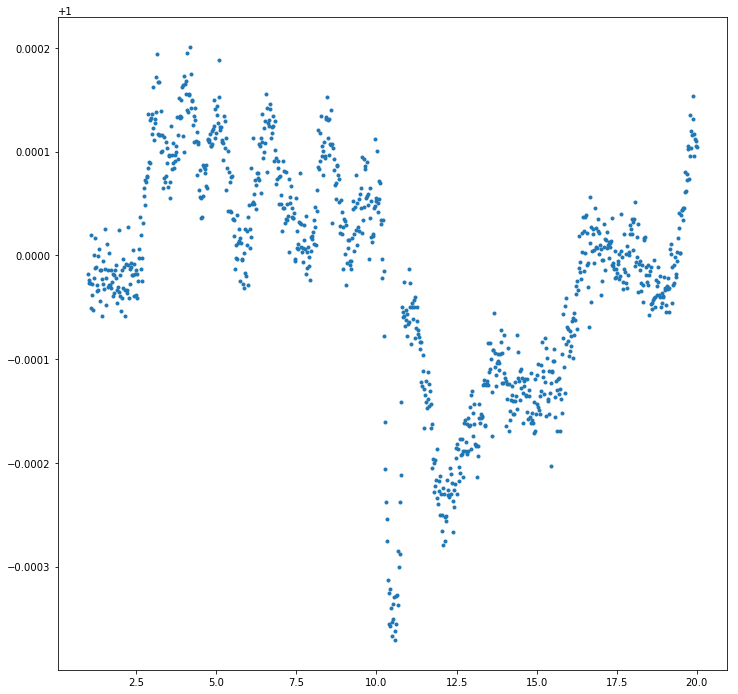

In [16]:
pl.plot(t, flux, '.')
pl.gcf().set_size_inches(12, 12)

In [ ]:
import batman

def transit_model(t0, per, ppm, a, inc, ecc, w, u0, u1, t):
    rp = np.sqrt(ppm/1e6)
    p = batman.TransitParams()
    p.t0, p.per, p.rp, p.a, p.inc, p.ecc, p.w, u0, u1 = t0, per, rp, a, inc, ecc, w, u0, u1
    p.u = [u0, u1]
    p.limb_dark = "quadratic"
    planet = batman.TransitModel(p, t)
    return planet.light_curve(p)

planet_params = [t[int(len(t)/2.)], 365, 100000, 215, 90, 0, 90, 0.5, 0.5]
pl.plot(t, transit_model(*planet_params, t))